In [1]:
# 加载需要的模块
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# 设置必要的环境
# 设置图表支持中文
plt.rcParams['font.family'] = ['Microsoft Yahei']
#  设置图表支持负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 读取数据
df = pd.read_csv('data.csv')
df.head(5)

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4A,成都·成华区,成华区,55.00,510176.0,NaN
1,都江堰,5A,成都·都江堰市,都江堰市,80.00,138580.0,NaN
2,青城山,5A,成都·都江堰市,都江堰市,0.36,73566.0,NaN
3,五凤溪古镇,4A,成都·金堂县,金堂县,9.00,42.0,NaN
4,花舞人间,4A,成都·新津县,新津县,66.50,8759.0,NaN


In [4]:
# 初步了解数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2880 non-null   object 
 1   level                460 non-null    object 
 2   city                 2880 non-null   object 
 3   address              2880 non-null   object 
 4   price                2880 non-null   float64
 5   comment              2654 non-null   float64
 6   sight_comment_score  1933 non-null   float64
dtypes: float64(3), object(4)
memory usage: 157.6+ KB


In [15]:
df.describe()

,level,price,comment,sight_comment_score
count,2880.000000,2880.000000,2654.000000,1933.000000
mean,0.642014,130.756392,4209.588169,4.798138
std,1.486528,428.169230,25988.641061,0.347926
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,7.000000,12.000000,4.700000
50%,0.000000,49.000000,106.000000,5.000000
75%,0.000000,100.000000,906.000000,5.000000
max,5.000000,11520.000000,747348.000000,5.000000


### 探索数据

In [8]:
# 通过head和describe观察，发现level可以转换成数字
df.head(5)

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4A,成都·成华区,成华区,55.00,510176.0,NaN
1,都江堰,5A,成都·都江堰市,都江堰市,80.00,138580.0,NaN
2,青城山,5A,成都·都江堰市,都江堰市,0.36,73566.0,NaN
3,五凤溪古镇,4A,成都·金堂县,金堂县,9.00,42.0,NaN
4,花舞人间,4A,成都·新津县,新津县,66.50,8759.0,NaN


In [14]:
# 查等级都有哪些，是否可以转换成数字
# df['level'].value_counts()
# # 判断是否有缺失值
# df['level'].isnull().sum()
# 处理字符串，将A去掉，并将缺失值填充为0，整体转为格式为int
df['level'] = df['level'].str.replace('A','').fillna(0).astype(int)
df.head(5)

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4,成都·成华区,成华区,55.00,510176.0,NaN
1,都江堰,5,成都·都江堰市,都江堰市,80.00,138580.0,NaN
2,青城山,5,成都·都江堰市,都江堰市,0.36,73566.0,NaN
3,五凤溪古镇,4,成都·金堂县,金堂县,9.00,42.0,NaN
4,花舞人间,4,成都·新津县,新津县,66.50,8759.0,NaN


In [17]:
# 查看最高价格门票的景区
# df[df['price']==11520]
# 获取最多的景区
df[df['comment']==747348]

,name,level,city,address,price,comment,sight_comment_score
338,故宫博物院,5,北京·东城区,东城区,30.0,747348.0,NaN


<Axes: xlabel='level'>

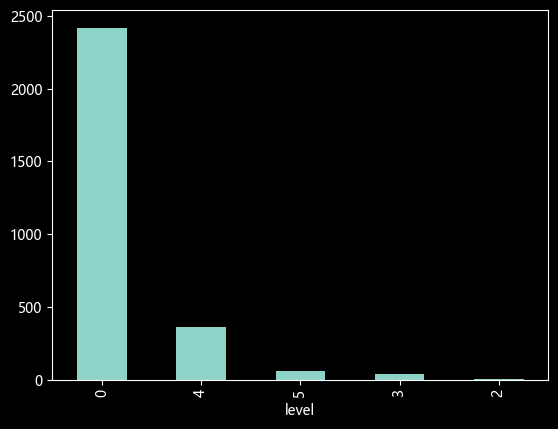

In [20]:
# 查看景区等级分布
# df['level'].value_counts()
df['level'].value_counts().plot(kind='bar')

In [21]:
# 查看景区评星分布
df['sight_comment_score'] = df['sight_comment_score'].fillna(0)
df.head(5)

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4,成都·成华区,成华区,55.00,510176.0,0.0
1,都江堰,5,成都·都江堰市,都江堰市,80.00,138580.0,0.0
2,青城山,5,成都·都江堰市,都江堰市,0.36,73566.0,0.0
3,五凤溪古镇,4,成都·金堂县,金堂县,9.00,42.0,0.0
4,花舞人间,4,成都·新津县,新津县,66.50,8759.0,0.0


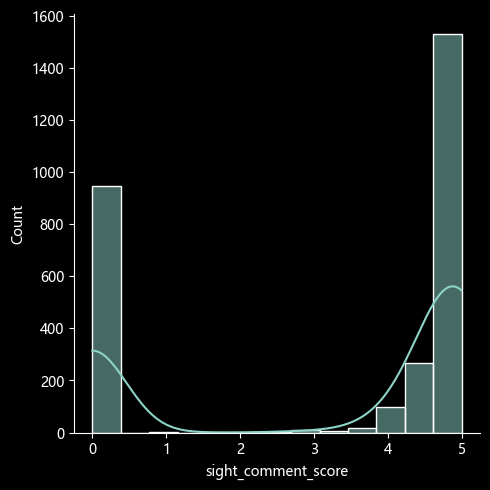

In [22]:
# pip install seaborn
import seaborn as sns

sns.displot(df['sight_comment_score'],kde=True)

<Axes: >

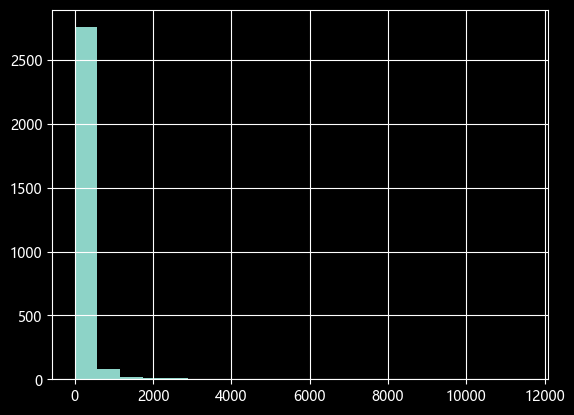

In [32]:
# 查看价格分布
# df['price'].value_counts()
df['price'].hist(bins=20)
# df['price'].sort_values(ascending=False).head(50)

In [36]:
# 查看评论数分布
# df['comment'].hist(bins=[0,100,1000,2000,5000,10000,20000,50000,100000,700000])
df['comment'].sort_values(ascending=False).head(20)

338     747348.0
411     547493.0
0       510176.0
311     297337.0
367     233469.0
265     203419.0
339     199211.0
288     189117.0
341     171353.0
337     169588.0
267     149121.0
413     143314.0
1       138580.0
268     135081.0
412     134031.0
340     117812.0
687     114914.0
1579    113086.0
344     110227.0
69      106366.0
Name: comment, dtype: float64

### 获取评论最多的前10个景点

In [42]:
# 数据预处理-处理city字段
df['city'] = df['city'].apply(lambda x:x.split('·')[0])

In [64]:
# 判断数据是否有重复
df2 = df[~df.duplicated(subset=['name','city'])]

In [65]:
# 获取评论最多的前10个景点
comment_top10 = df2.sort_values(by='comment',ascending=False).head(10)
comment_top10

,name,level,city,address,price,comment,sight_comment_score
338,故宫博物院,5,北京,东城区,30.0,747348.0,0.0
411,上海迪士尼乐园,0,上海,浦东新区,425.0,547493.0,0.0
0,成都大熊猫繁育研究基地,4,成都,成华区,55.0,510176.0,0.0
311,秦始皇帝陵博物院（兵马俑）,5,西安,临潼区,120.0,297337.0,0.0
367,长隆野生动物世界,0,广州,广州长隆旅游度假区,240.0,233469.0,0.0
265,南山文化旅游区,5,三亚,崖州区,122.0,203419.0,0.0
339,八达岭长城,5,北京,延庆县,43.6,199211.0,0.0
288,拙政园,5,苏州,平江区,0.6,189117.0,0.0
341,颐和园,5,北京,海淀区,15.0,171353.0,0.0
337,北京环球度假区,0,北京,通州区,516.0,169588.0,0.0


<Axes: xlabel='name'>

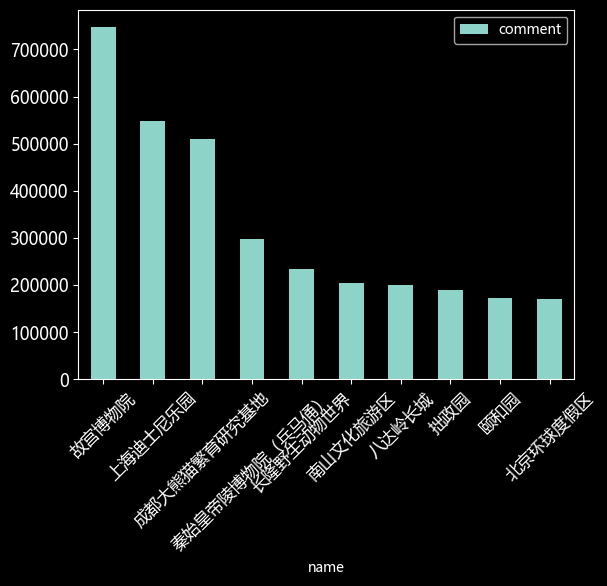

In [57]:
# 通过图表显示数据
comment_top10.plot(kind='bar',x='name',y='comment',rot=45,fontsize=12)

### 获取评论最多的前10个5A景点

In [58]:

comment_5a_top10 = df2[df2['level']==5].sort_values(by='comment',ascending=False).head(10)
comment_5a_top10

,name,level,city,address,price,comment,sight_comment_score
338,故宫博物院,5,北京,东城区,30.0,747348.0,0.0
311,秦始皇帝陵博物院（兵马俑）,5,西安,临潼区,120.0,297337.0,0.0
265,南山文化旅游区,5,三亚,崖州区,122.0,203419.0,0.0
339,八达岭长城,5,北京,延庆县,43.6,199211.0,0.0
288,拙政园,5,苏州,平江区,0.6,189117.0,0.0
341,颐和园,5,北京,海淀区,15.0,171353.0,0.0
267,三亚蜈支洲岛旅游区,5,三亚,海棠区,140.0,149121.0,0.0
413,东方明珠,5,上海,浦东新区,80.0,143314.0,0.0
1,都江堰,5,成都,都江堰市,80.0,138580.0,0.0
412,上海野生动物园,5,上海,浦东新区,165.0,134031.0,0.0


<Axes: xlabel='name'>

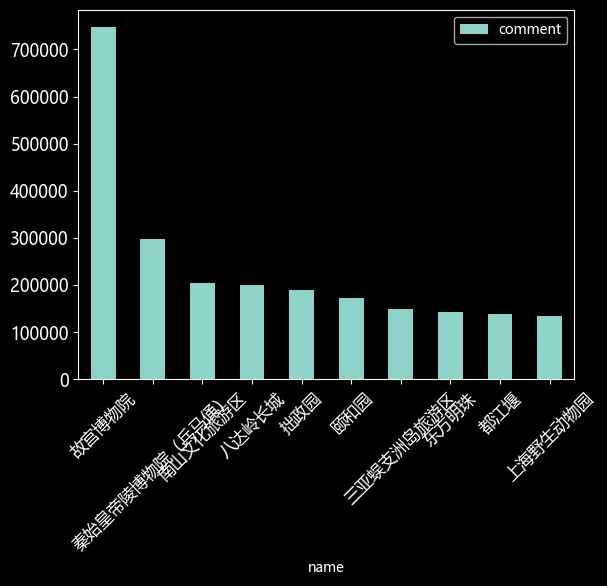

In [59]:
# 通过图表显示数据
comment_5a_top10.plot(kind='bar',x='name',y='comment',rot=45,fontsize=12)

### 查看景区等级和市区的关系

In [75]:
# 获取每个城市对应等级景区的数量
lc_df = df.groupby(['city','level']).size()
# 转换数据格式
lc_df = lc_df.unstack().fillna(0)
lc_df

level,0,2,3,4,5
city,,,,,
三亚,228.0,0.0,1.0,7.0,4.0
上海,170.0,0.0,10.0,57.0,3.0
丽江,224.0,2.0,2.0,7.0,2.0
北京,153.0,3.0,7.0,67.0,10.0
厦门,229.0,0.0,1.0,9.0,1.0
大理,0.0,0.0,0.0,1.0,1.0
广州,195.0,0.0,6.0,37.0,2.0
成都,206.0,0.0,0.0,31.0,3.0
杭州,199.0,0.0,2.0,35.0,4.0


<Axes: xlabel='city'>

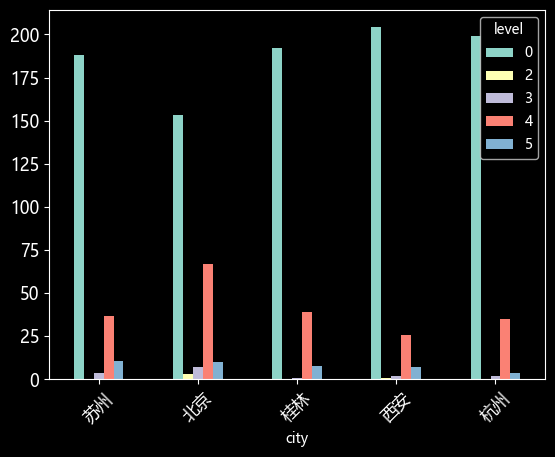

In [79]:
# 进行数据排序
lc_sort_df = lc_df.sort_values(by=[5,4],ascending=False)
# lc_sort_df.head(5)
# 通过图表显示数据
lc_sort_df.head(5).plot(kind='bar',rot=45,fontsize=12)

In [83]:
df.head(5)
# # 筛选对应的数据列
# rs_df = df[['price','comment_count','sight_comment_score','level','city','address']]
# # 判断是否有缺失值
# rs_df.isnull().sum()

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4,成都,成华区,55.00,510176.0,0.0
1,都江堰,5,成都,都江堰市,80.00,138580.0,0.0
2,青城山,5,成都,都江堰市,0.36,73566.0,0.0
3,五凤溪古镇,4,成都,金堂县,9.00,42.0,0.0
4,花舞人间,4,成都,新津县,66.50,8759.0,0.0


### 建模前-数据预处理

In [107]:
df.head(5)

,name,level,city,address,price,comment,sight_comment_score
0,成都大熊猫繁育研究基地,4,成都,成华区,55.00,510176.0,0.0
1,都江堰,5,成都,都江堰市,80.00,138580.0,0.0
2,青城山,5,成都,都江堰市,0.36,73566.0,0.0
3,五凤溪古镇,4,成都,金堂县,9.00,42.0,0.0
4,花舞人间,4,成都,新津县,66.50,8759.0,0.0


In [108]:
# 提取数据数据
rs_df = df[['level','city','address','price','comment','sight_comment_score']]
rs_df.head(5)

,level,city,address,price,comment,sight_comment_score
0,4,成都,成华区,55.00,510176.0,0.0
1,5,成都,都江堰市,80.00,138580.0,0.0
2,5,成都,都江堰市,0.36,73566.0,0.0
3,4,成都,金堂县,9.00,42.0,0.0
4,4,成都,新津县,66.50,8759.0,0.0


In [111]:
# 判断是否有缺失值
rs_df.isnull().sum()
# 将缺失值填充为0
# rs_df['comment'] = rs_df['comment'].fillna(0)

level                  0
city                   0
address                0
price                  0
comment                0
sight_comment_score    0
dtype: int64

In [113]:
# 将city,address进行One-Hot编码
ca_df = pd.get_dummies(rs_df[['city','address']],dtype='int')
ca_df.head(5)

,city_三亚,city_上海,city_丽江,city_北京,city_厦门,city_大理,city_广州,city_成都,city_杭州,city_桂林,...,address_黑龙潭,address_鼓浪屿,address_龙华新区,address_龙岗区,address_龙庆峡,address_龙泉驿,address_龙胜县,address_龙胜温泉旅游度假区,address_龙脊梯田,address_龙门山
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# 将ca_df和rs_df进行合并
rs_df1 = pd.merge(rs_df,ca_df,left_index=True,right_index=True)
# rs_df1.head(5)
# 删除city和address列
rs_df1.drop(['city','address'],axis=1,inplace=True)
rs_df1.head(5)

,level,price,comment,sight_comment_score,city_三亚,city_上海,city_丽江,city_北京,city_厦门,city_大理,...,address_黑龙潭,address_鼓浪屿,address_龙华新区,address_龙岗区,address_龙庆峡,address_龙泉驿,address_龙胜县,address_龙胜温泉旅游度假区,address_龙脊梯田,address_龙门山
0,4,55.00,510176.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,80.00,138580.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.36,73566.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,9.00,42.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,66.50,8759.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 建模

In [124]:
# 引入模块
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [129]:
# 准备样本数据
# 获取除了price之外的所有列
columns = rs_df1.columns.difference(['price'])
# 获取特征值
x = rs_df1[columns].values
# 获取标签
y = rs_df1['price'].values
y

array([5.50e+01, 8.00e+01, 3.60e-01, ..., 6.80e+02, 1.58e+02, 2.58e+03])

In [130]:
# 数据的拆分7:3
# x特征值 y标签 train训练集 test测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=666)

In [131]:
# 数据的训练
# 随机森林回归
# n_estimators:森林中树的数量
# max_depth:树的最大深度
# 调整n_estimators和max_depth的值，可以提高模型的准确率
rf = RandomForestRegressor(n_estimators=20,max_depth=7)
#  模型的训练
rf.fit(x_train,y_train)
# 模型的预测
pred = rf.predict(x_test)
pred

array([  90.72447299,   90.72447299,  105.39532671,  114.40418436,
         90.72447299,  110.60610708,   90.72447299,   90.72447299,
         90.72447299,   90.72447299,   90.72447299,   90.72447299,
         90.72447299,   90.72447299,  101.84704713,   97.9064696 ,
         90.72447299,  139.19806861,   90.72447299,  106.56556861,
         90.72447299,   90.72447299,  114.40418436,   90.72447299,
         90.72447299,   90.72447299,   90.72447299,   90.72447299,
         90.72447299,  100.13740286,  110.60610708,  100.13740286,
         98.25863234,   90.72447299,   90.72447299,   90.72447299,
         90.72447299,  101.84704713,   90.72447299,   90.72447299,
        134.28581846,   83.05101174,   90.72447299,  113.62630974,
         90.72447299,   90.72447299,   90.72447299,   90.72447299,
         90.72447299,   90.72447299,  110.60610708,   90.72447299,
         90.72447299,   90.72447299,   90.72447299,   90.72447299,
         90.72447299,   90.72447299,   59.13271863, 1356.18670

In [132]:
# 模型的评估
# 均方误差, 值 越小越好
print('均方误差:',mean_squared_error(y_test,pred))
# 平均绝对误差 值 越小越好
print('平均绝对误差:',mean_absolute_error(y_test,pred))

均方误差: 211461.29762863263
平均绝对误差: 159.09443757983374


In [ ]:
# 查看matplotlib支持的字体
import matplotlib.font_manager as fm
fm.fontManager.ttflist